In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from PIL import Image as im

Buatlah fungsi konvolusi

Load Image yg akan di prosses

In [ ]:
def convolution(image, kernel, stride, padding):
    img = cv.imread('D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\mandrill.tiff')
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening 
sebagai berikut: 

In [5]:
kernel_shape = np.array([[1, 0, 0],
                         [1, 5, -1],
                         [0, -1, 0]])

Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil 
konvolusinya: 

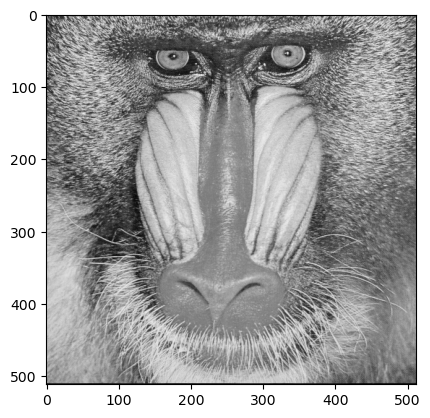

In [ ]:
img = cv.imread('D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
convolution(img_gray, kernel_shape, 1, 2)

plt.imshow(img_gray, cmap='gray')

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter 
berikut: 

Average Filter

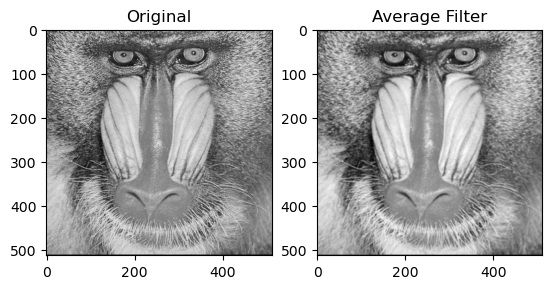

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dengan path benar
img = cv.imread(r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\mandrill.tiff",
                cv.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan, cek kembali path-nya!")

# Kernel Average (3x3)
kernel_avg = np.ones((3,3), np.float32) / 9
average_filtered = cv.filter2D(img, -1, kernel_avg)

# Tampilkan
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(average_filtered, cmap='gray'), plt.title("Average Filter")
plt.show()


Low Pass Filter

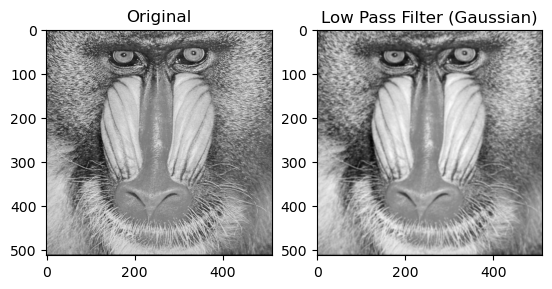

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar grayscale
img = cv.imread(r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\mandrill.tiff",
                cv.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan, cek path-nya!")

# Low Pass Filter dengan Gaussian Blur (ukuran kernel 5x5)
low_pass = cv.GaussianBlur(img, (5,5), 0)

# Tampilkan hasil
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(low_pass, cmap='gray'), plt.title("Low Pass Filter (Gaussian)")
plt.show()


3. High Pass Filter

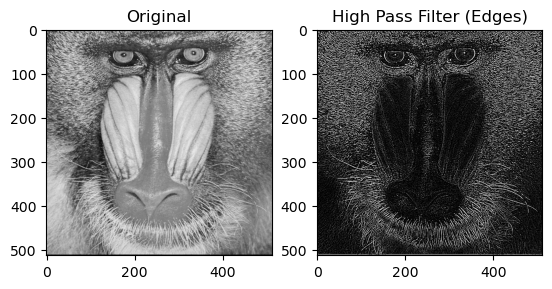

In [ ]:
import numpy as np


kernel_hp = np.array([[-1,-1,-1],
                      [-1, 8,-1],
                      [-1,-1,-1]])

high_pass = cv.filter2D(img, -1, kernel_hp)

# Tampilkan hasil
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(high_pass, cmap='gray'), plt.title("High Pass Filter (Edges)")
plt.show()


Sharpen

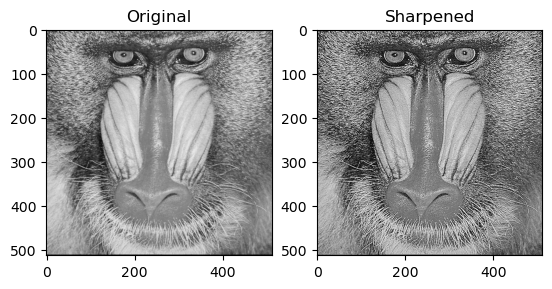

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread(r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\mandrill.tiff",
                cv.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan, cek path-nya!")

# Kernel Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

sharpened = cv.filter2D(img, -1, kernel_sharpen)

plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(sharpened, cmap="gray"), plt.title("Sharpened")
plt.show()


Emboss Filter

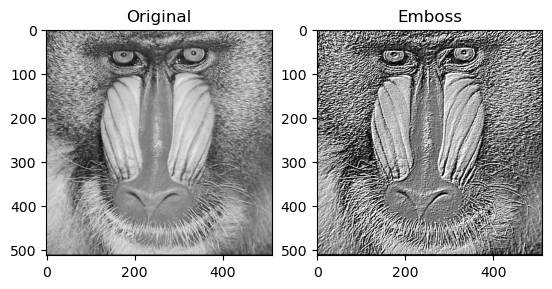

In [15]:
# Kernel Emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

embossed = cv.filter2D(img, -1, kernel_emboss)
embossed = cv.normalize(embossed, None, 0, 255, cv.NORM_MINMAX)  # normalisasi agar tidak terlalu gelap

plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(embossed, cmap="gray"), plt.title("Emboss")
plt.show()


Sobel Edge Detection

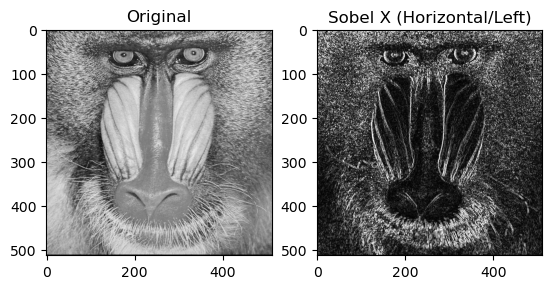

In [16]:
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
sobel_x = cv.convertScaleAbs(sobel_x)  # konversi ke uint8

plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(sobel_x, cmap="gray"), plt.title("Sobel X (Horizontal/Left)")
plt.show()


Canny Edge Detection

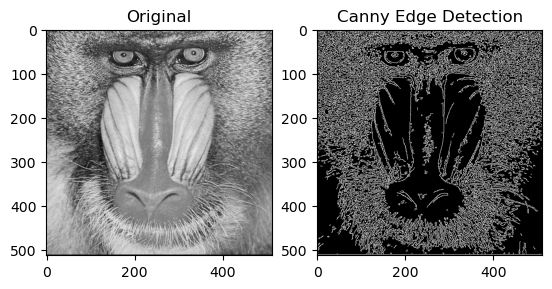

In [17]:
# Canny Edge Detection (threshold 100-200)
canny_edges = cv.Canny(img, 100, 200)

plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(canny_edges, cmap="gray"), plt.title("Canny Edge Detection")
plt.show()


Gaussian Blur 21x21

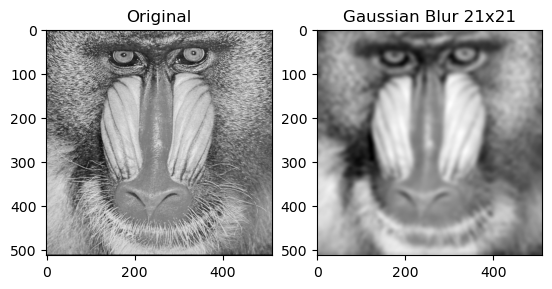

In [18]:
import math

kernel_size = 21
sigma = math.sqrt(kernel_size)

# Buat kernel Gaussian manual
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.T

# Terapkan filter
gaussian_blur = cv.filter2D(img, -1, gauss_kernel)

plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(gaussian_blur, cmap="gray"), plt.title("Gaussian Blur 21x21")
plt.show()


E. FILTER LIBRARY DAN FILTER MODERN 

Percobaan 1: 
Pada percobaan 1 ini, kita akan membuat Filter Gaussian, Sharpen, dan Canny menggunakan library 
filter2d dari OpenCV. Filter ini akan kita terapkan pada Image RGB. Pada bagian awal kode terdapat 
fungsi show_side_by_side yang digunakan untuk menampilkan gambar secara berdampingan

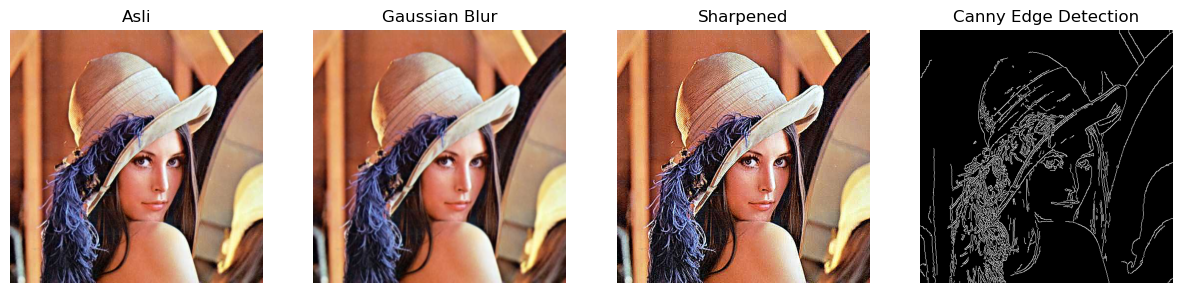

In [19]:
# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
	plt.figure(figsize=figsize)
	for i, (img, title) in enumerate(zip(images, titles)):
		plt.subplot(1, len(images), i+1)
		if len(img.shape) == 2:  
			plt.imshow(img, cmap="gray")
		else:  
			plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
		plt.title(title)
		plt.axis("off")
	plt.show()

img = cv.imread("D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\lena.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(img_gray, 100, 200)
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)
show_side_by_side([img, blur, sharpened, edges],
				  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])

Percobaan 2:

Pada percobaan 2 berikut ini akan dilakukan filtering modern dari Library OpenCV. Dua filter yang akan 
digunakan adalah Bilateral Filtering dan Guided Filter. Bilateral filtering adalah sebuah metode 
penyaringan non-linear yang banyak digunakan untuk menghaluskan citra sekaligus tetap 
mempertahankan ketajaman tepi. Berbeda dengan Gaussian blur biasa yang hanya memperhitungkan 
jarak spasial antar piksel, bilateral filter juga mempertimbangkan perbedaan intensitas warna. Dengan 
cara ini, piksel-piksel yang letaknya dekat dan memiliki warna mirip dengan pusat jendela akan 
mendapat bobot lebih besar dalam perhitungan, sedangkan piksel dengan perbedaan warna kontras 
(misalnya di sisi tepi) akan tereduksi pengaruhnya. Akibatnya, citra menjadi lebih halus pada area 
datar, namun garis batas dan detail penting tetap terjaga. Meskipun menghasilkan kualitas yang baik, 
bilateral filter tergolong lambat karena perhitungan bobot yang cukup kompleks. Dalam praktiknya, 
filter ini banyak dipakai untuk keperluan seperti perbaikan kualitas foto, pengurangan noise, maupun 
sebagai dasar dari efek beauty filter untuk melembutkan tekstur kulit tanpa mengaburkan kontur 
wajah.

Guided filtering merupakan teknik yang lebih modern dan efisien. Filter ini didasarkan pada asumsi 
bahwa, dalam sebuah jendela lokal, hasil penyaringan dapat direpresentasikan sebagai fungsi linear 
dari citra pemandu (guide image). Artinya, setiap piksel keluaran dihitung dengan mempertimbangkan 
hubungan linier antara nilai piksel di citra masukan dengan nilai piksel pada citra pemandu. Jika citra 
masukan dan citra pemandu sama, guided filter akan berperan mirip bilateral filter namun dengan 
perhitungan yang jauh lebih cepat dan hasil yang lebih halus. Keunggulan lainnya, guided filter bisa 
menggunakan citra yang berbeda sebagai pemandu sehingga mampu mengarahkan proses filtering 
sesuai kebutuhan. Berkat sifat ini, guided filter sering dipakai dalam berbagai aplikasi lanjutan seperti 
HDR tone mapping, peningkatan detail, image matting, feathering, serta pemurnian depth map pada 
sistem stereo vision. Secara umum, guided filter menawarkan keseimbangan antara preservasi tepi 
yang baik, kualitas visual yang halus, dan efisiensi komputasi, sehingga dianggap sebagai 
penyempurnaan dari pendekatan bilateral filtering.

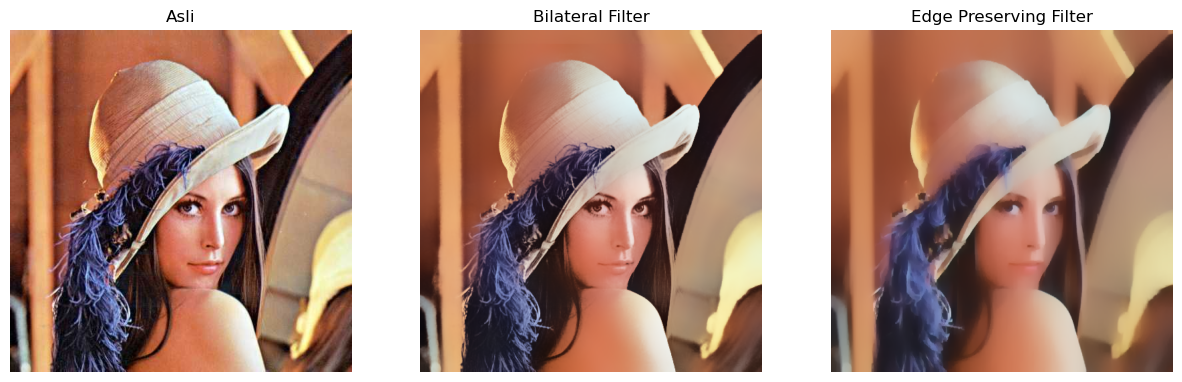

In [21]:
#Filter Modern dari OpenCV
# Bilateral Filter (edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)
# Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)
show_side_by_side([img, bilateral, edge_preserve],
				  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])

Percobaan 3:

Percobaan kali ini akan mencoba melihat proses Filtering pada CNN (bagian Feature Map), lakukan 
running code beberapa kali dan perhatikan hasil outputnya. Apa yang dapat kamu simpulkan dari hasil 
keluaran tersebut.

In [25]:
!pip install torch

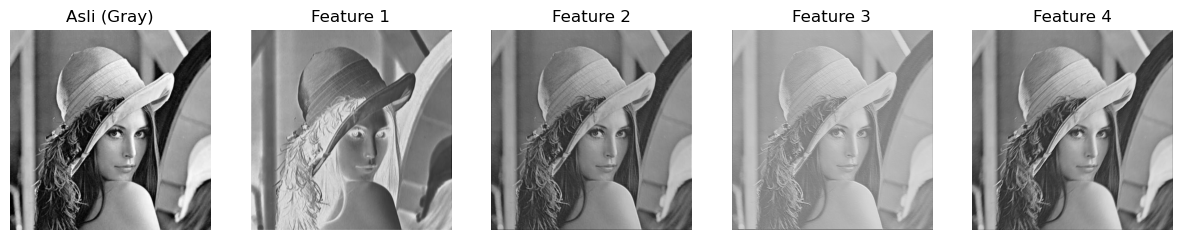

In [26]:
#Filter Feature Map yang digunakan pada CNN, Lakukan running code bagian ini beberapa kali dan perhatikan hasilnya

import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
	def __init__(self):
		super(SimpleCNN, self).__init__()
		self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
	def forward(self, x):
		return self.conv1(x)

model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
	features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0, i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps, ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])

Percobaan 4:

Percobaan kali ini akan melakukan efek Beauty dan Vintage yang biasanya digunakan pada Aplikasi 
popular saat ini. Filter yang digunakan merupakan kombinasi dari filter tradisional. Perlu diketahui 
untuk filter aplikasi popular bisa jadi tidak menggunakan metode yang sama. Pada Aplikasi popular 
bisa jadi menggunakan model GenAI dengan data Training untuk memberikan hasil yang lebih akurat.

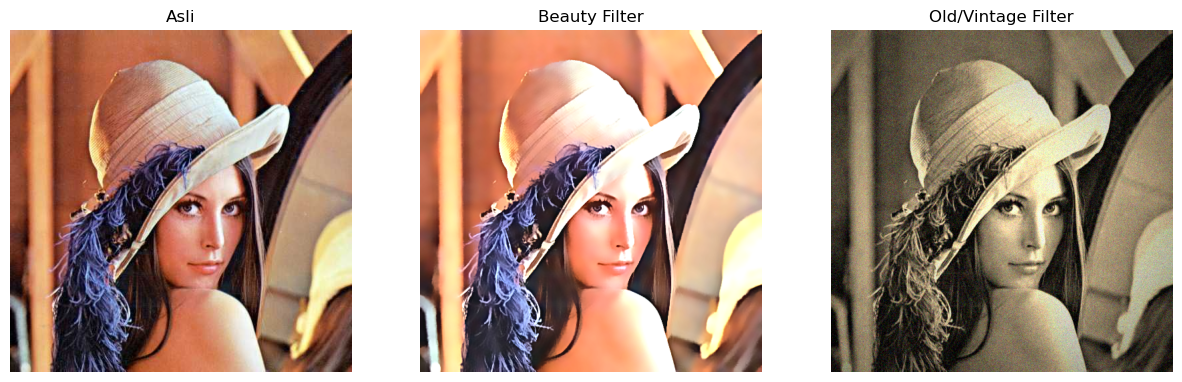

In [28]:
# ===
# 1. Beauty Filter
# ===
# Step 1: Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)
# Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0, 0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)
# Step 3: Brightness & contrast
alpha = 1.2 # contrast
beta = 15   # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# 2. Old/Vintage Filter
# Step 1: Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
						 [0.349, 0.686, 0.168],
						 [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2: Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols * 0.6)
kernel_y = cv.getGaussianKernel(rows, rows * 0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
	vignette[:, :, i] = vignette[:, :, i] * mask

# Step 3: Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Tampilkan hasil
show_side_by_side([img, beauty, old_img],
                  ["Asli", "Beauty Filter", "Old/Vintage Filter"])

Percobaan 5: 

Percobaan 5 akan menunjukkan pada anda filter anime / cartoon menggunakan kombinasi filter 
tradisional. 

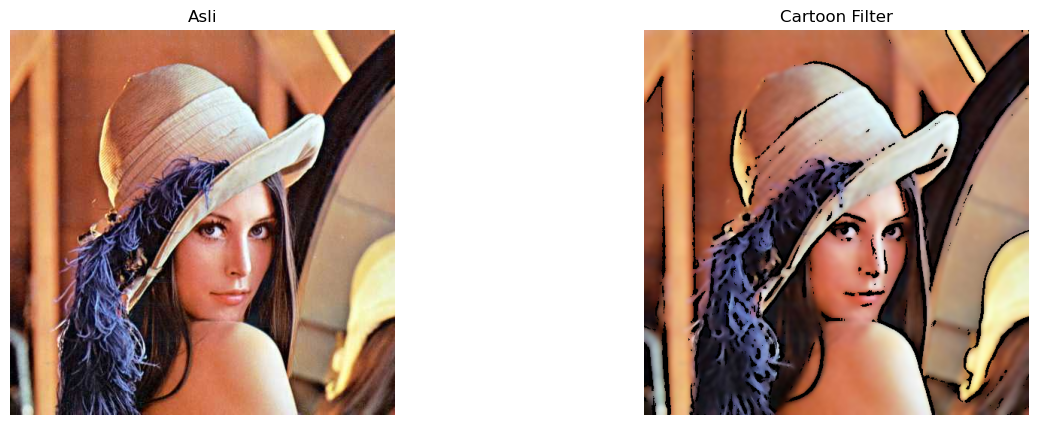

In [29]:
# Filter Anime / Cartoon
# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
							 cv.ADAPTIVE_THRESH_MEAN_C,
							 cv.THRESH_BINARY, 9, 9)
# Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)
# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)
# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

Percobaan 6: 


Pada Percobaan 6 akan ditunjukkan contoh Filter Malam. 

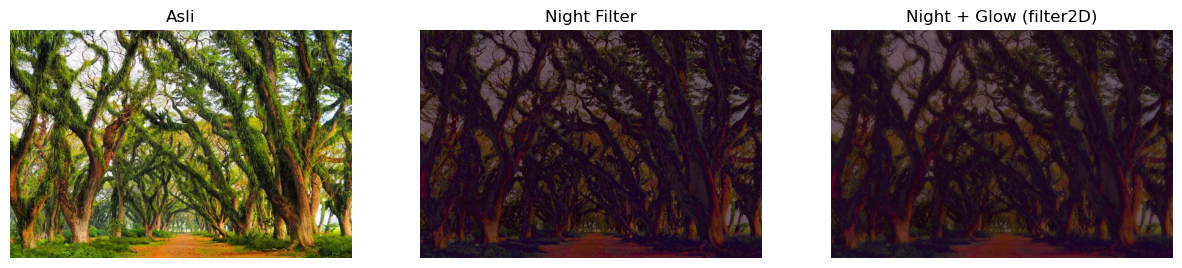

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan beberapa gambar berdampingan
def show_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (im, title) in enumerate(zip(images, titles), 1):
        im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)  # konversi BGR → RGB
        plt.subplot(1, len(images), i)
        plt.imshow(im_rgb)
        plt.title(title)
        plt.axis("off")
    plt.show()

# Night Filter
img = cv.imread(r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\djawatan.png")

if img is None:
    raise FileNotFoundError("Cek path gambar, file tidak ditemukan!")

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100))  # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)  # FIX alpha

# Step 3: Efek glow dengan filter2D (blur kernel)
kernel = np.ones((15, 15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Step 4: Kombinasikan night + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

# Tampilkan hasil
show_side_by_side(
    [img, night, night_glow],
    ["Asli", "Night Filter", "Night + Glow (filter2D)"]
)


Percobaan 7 


Percobaan 7 menunjukkan Filter Pagi dan Pagi ditambahkan efek kabut. 


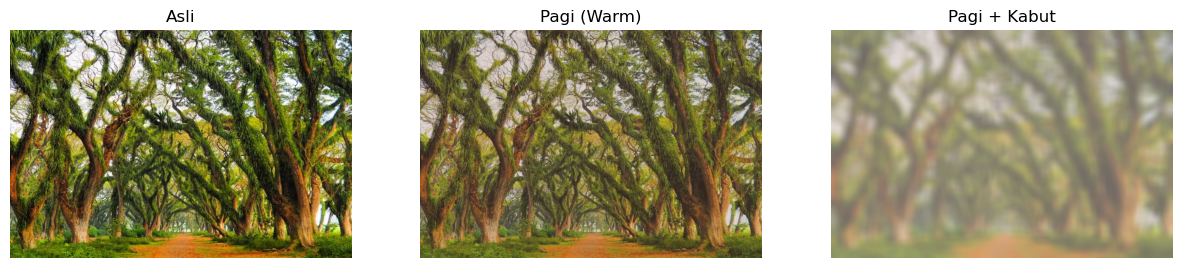

In [14]:
def show_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (im, title) in enumerate(zip(images, titles), 1):
        im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB) 
        plt.subplot(1, len(images), i)
        plt.imshow(im_rgb)
        plt.title(title)
        plt.axis("off")
    plt.show()

# Baca gambar
img = cv.imread(r"D:\File untuk kuliah\Semester-5\Pengolahan Citra dan Visi Komputer\colab_ipynb\PCVK\Assets\PCVK\Images\djawatan.png")
if img is None:
    raise FileNotFoundError("Cek path gambar!")

# Step 1: Kurangi kontras & cerahkan
alpha = 0.9  # contrast
beta = 20    # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# Step 2: Tambahkan warm tone (kemerahan / oranye)
warm_tint = np.full_like(soft, (40, 70, 120))  # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# Step 3: Tambahkan haze (kabut tipis) dengan Gaussian blur
kernel_size = 21
sigma = 15
kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel = kernel @ kernel.T  # buat jadi 2D
kabut = cv.filter2D(pagi, -1, kernel)

# Tambahkan layer putih tipis untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

# Tampilkan hasil
show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi (Warm)", "Pagi + Kabut"])